<a href="https://colab.research.google.com/github/alexapruiz/Projetos/blob/master/Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando os dados

In [22]:
#Importando as bibliotecas para manipulação dos dados e geração de gráficos
import pandas as pd
import matplotlib.pyplot as plt

#Importando as bibliotecas de Machine Learning
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
#Atribuindo nomes às colunas
colunas = ['id','idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo','coracao']

#Abrindo o arquivo do Kaggle
cardio = pd.read_csv('cardio_train.csv', sep=';',names=colunas,header=0)

In [24]:
#Definindo os DataFrames de dados e o 'alvo'
x = cardio[colunas]
y = cardio['coracao']

# Explorando os dados

In [25]:
#Verificando o formato do DataFrame (linhas,colunas)
cardio.shape

(70000, 13)

In [26]:
#Iniciando a análise exploratória
cardio.head()

,id,idade,genero,altura,peso,pressao_max,pressao_min,colesterol,diabetes,fuma,bebe,ativo,coracao
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
#Consultando quantos registros indicam a presença / ausência de doença cardiovascular (0: Não possui doença / 1: Possui doença)
cardio.groupby('coracao').size()

coracao
0    35021
1    34979
dtype: int64

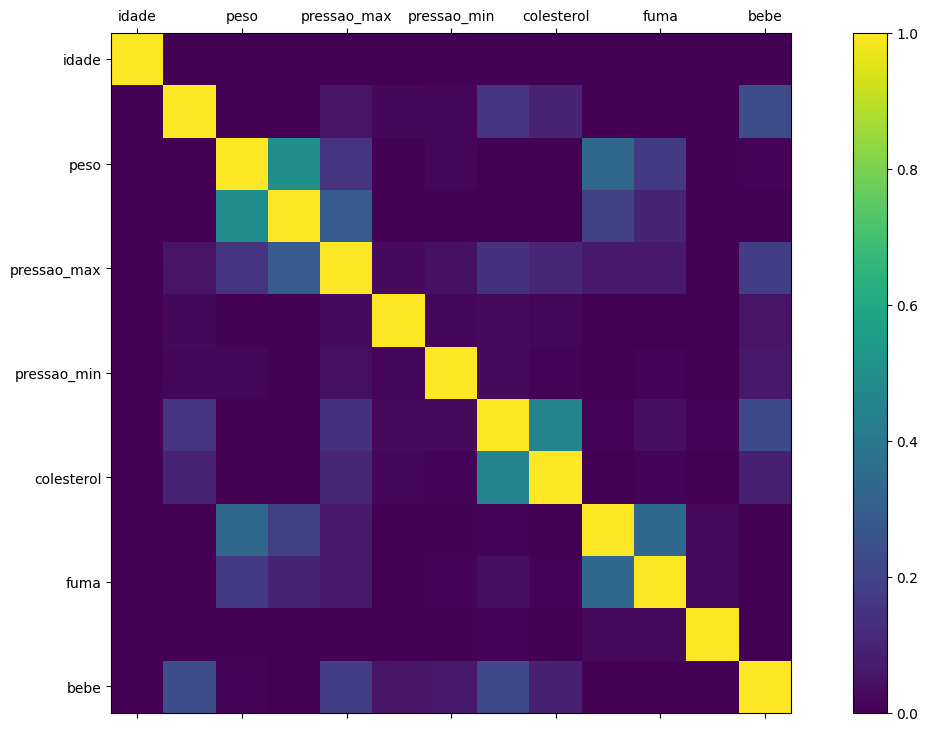

In [36]:
#Verificando a correlação entre os atributos
correlacao = cardio.corr()

#Criando um gráfico para exibir a correlação
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin = 0, vmax = 1)
fig.colorbar(cax)
ax.set_xticklabels(['id','idade','peso','pressao_max','pressao_min','colesterol','fuma','bebe'])
ax.set_yticklabels(['id','idade','peso','pressao_max','pressao_min','colesterol','fuma','bebe'])
plt.show()

# Normalizando os dados

In [ ]:
#Limpando as colunas com valores negativos
cardio = cardio[(cardio['pressao_min'] > 0) & (cardio['pressao_max'] > 0)]
cardio

,id,idade,genero,altura,peso,pressao_max,pressao_min,colesterol,diabetes,fuma,bebe,ativo,coracao
0,1,20228,1,156,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
1,2,18857,1,165,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
2,3,17623,2,169,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
3,4,17474,1,156,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
4,8,21914,1,151,67.0,120.0,80.0,2.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24484,34965,22580,2,169,80.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
24485,34966,17484,2,174,79.0,120.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
24486,34968,21246,1,160,70.0,170.0,100.0,2.0,1.0,0.0,0.0,1.0,0.0
24487,34969,21180,1,169,67.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0


# Selecionando as melhores variáveis

In [ ]:
#Selecionando as melhores features usando o método Chi2 (qui-quadrado)

from pandas import read_csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

colunas = ['idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']
array = cardio[colunas].values

# Separando o array em componentes de input e output
X = array[:,0:-1]
Y = array[:,-1]

# Extração de Variáveis
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X, Y)

# Sumarizando o score
#print(fit.scores_)
features = fit.transform(X)
cols = fit.get_support(indices=True)
cardio.iloc[:,cols].head()

In [ ]:
#Selecionando as melhores features usando o método f_classif do SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,Y)
features = fit.transform(X)

features
cols = fit.get_support(indices=True)
cardio.iloc[:,cols].head()

In [ ]:
#Selecionando as melhores features usando o método RFE (Recursive Feature Elimination)
# Não é recomendado para grandes bases de dados

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

colunas = ['idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']
array = cardio[colunas].values

# Separando o array em componentes de input e output
X = array[:,0:-1]
Y = array[:,-1]

model = LogisticRegression(max_iter=2000)
rfe = RFE(model,4)
fit = rfe.fit(X, Y)
#print('Número de features: {}'.format(fit.n_features_))

cols = fit.get_support(indices=True)
cardio.iloc[:,cols].head()

In [ ]:
#Selecionando as melhores features usando: Feature Importance
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

colunas = ['idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']
array = cardio[colunas].values

# Separando o array em componentes de input e output
X = array[:,0:]
Y = array[:,-1]

modelo = RandomForestClassifier(n_estimators=10)
modelo.fit(X, Y)
print(modelo.feature_importances_)
colunas = ['idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']

feature_importance = pd.DataFrame(modelo.feature_importances_, index=colunas, columns=['importance']).sort_values('importance', ascending=False)

feature_importance

# Automatizando a seleção de features

In [ ]:
#Automatizando a seleção de features com pipeline
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification',RandomForestClassifier())
])

In [ ]:
clf.fit(X, Y)

In [ ]:
clf.steps

# Criando um modelo de regressão linear

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

In [ ]:
#53.92380952380952
print('Acurácia com Regressão Linear: ' + str(accuracy_score(teste_y,previsoes) * 100))

Acurácia com Regressão Linear: 53.92380952380952


# Criando um modelo com 'RandomForestClassifier'

In [ ]:
#Importando as bibliotecas de Machine Learning
from sklearn.ensemble import RandomForestClassifier

In [ ]:
colunas = ['id','idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo','coração']
cardio = pd.read_csv('cardio_original.csv', sep=';',names=colunas,header=1)

In [ ]:
x = cardio[['id','idade','genero','peso','altura','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']]

y = cardio['coração']

In [ ]:
x['IMC'] = (x['peso'] / ((x['altura'] / 100) ** 2))

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.7,random_state=20)

In [ ]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=10)
modelo.fit(treino_x, treino_y)
p = modelo.predict(teste_x)

In [ ]:
#72.3204081632653 (test_size=0.7,random_state=20)
acc = np.mean(teste_y == p) * 100
acc

72.3204081632653

# Validação Cruzada (RepeatedKFold) com RandomForestClassifier

In [ ]:
#Importando as bibliotecas de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [ ]:
#Usando uma técnica de reamostragem -> Validação Cruzada
resultados = []
kf = RepeatedKFold(n_splits=4, n_repeats=20, random_state=20)

for linhas_treino, linhas_valid in kf.split(x):
  X_treino , X_valid = x.iloc[linhas_treino], x.iloc[linhas_valid]
  y_treino , y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  modelo.fit(X_treino, y_treino)
  p = modelo.predict(X_valid)
  acc = np.mean(y_valid == p)
  resultados.append(acc)
  print('Acc: ',acc)  

In [ ]:
#0.7242267729584547
np.mean(resultados)

0.7242267729584547

# XGBoost

In [ ]:
# importar bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# separar entre as variáveis X e y
colunas = ['id','idade','genero','altura','peso','pressao_min','pressao_max','colesterol','diabetes','fuma','bebe','ativo']
X = cardio[colunas]
Y = cardio['coracao']

# dividir entre conjuntos de treino e teste
train_X, test_X, train_y, test_y = train_test_split(X.values, Y.values, test_size=0.2)

# lidar com os valores ausentes
df_imputer = SimpleImputer()
train_X = df_imputer.fit_transform(train_X)
test_X = df_imputer.transform(test_X)

# instanciar o modelo XGBoost
model = XGBRegressor()

# chamar o fit para o modelo
model.fit(train_X, train_y, verbose=False)

# fazer previsões em cima do dataset de teste
predictions = model.predict(test_X)

print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(predictions, test_y)))

# Analisando os erros do modelo

In [ ]:
Compara = teste_x.copy()
Compara['Real'] = cardio['coração']
Compara['Previsão'] = p
Compara[Compara['Previsão'] != Compara['Real']]
erros = Compara[Compara['Previsão'] != Compara['Real']]
erros

In [ ]:
erros[(erros['fuma'] == 0) & (erros['bebe'] == 0) & (erros['diabetes'] == 1) & (erros['colesterol'] == 1) & (erros['IMC'] > 30) & (erros['Real'] == 1)]

In [ ]:
#erros[erros['IMC'] > 50]
#np.mean(erros['IMC'])
365 * 45

16425

# DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split

X = df_model.drop('num', axis = 1)
y = df_model['num']
SEED = 42
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size = 0.20)
print('O dataset de treino possui {} pacientes e o de treino {} pacientes.'.format(X_train.shape[0], X_test.shape[0]))

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

In [ ]:
np.random.seed(SEED)model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))
Out >>> A acurácia foi de 82.76%.